In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# usual imports
import numpy as np
import pandas as pd
import visualization as vis

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [4]:
bank = pd.read_csv('~/data/bank/bank-additional-full.csv', sep=';')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [14]:
## label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = dict()

for feature in ['job','marital', 'education', 'default', 'housing', 'loan', 'contact',
               'month', 'day_of_week', 'poutcome', 'y']:
    print('encoding feature: {}'.format(feature))
    label_encoder[feature] = LabelEncoder()
    label_encoder[feature].fit(bank[feature])
    bank.loc[:, feature + '_le'] = label_encoder[feature].transform(bank[feature])


encoding feature: job
encoding feature: marital
encoding feature: education
encoding feature: default
encoding feature: housing
encoding feature: loan
encoding feature: contact
encoding feature: month
encoding feature: day_of_week
encoding feature: poutcome
encoding feature: y


In [15]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,education_le,marital_le,default_le,housing_le,loan_le,contact_le,month_le,day_of_week_le,poutcome_le,y_le
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,0,1,6,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,3,1,1,0,0,1,6,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,3,1,0,2,0,1,6,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,1,0,0,0,1,6,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,3,1,0,0,2,1,6,1,1,0


In [24]:
labels = bank['y_le']
train =bank.drop(['job','marital', 'education', 'default', 'housing', 'loan', 'contact',
               'month', 'day_of_week', 'poutcome', 'y', 'y_le'], axis=1)

In [25]:
print (train.shape)
print (labels.shape)

(41188, 20)
(41188,)


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
job_le            41188 non-null int64
education_le      41188 non-null int64
marital_le        41188 non-null int64
default_le        41188 non-null int64
housing_le        41188 non-null int64
loan_le           41188 non-null int64
contact_le        41188 non-null int64
month_le          41188 non-null int64
day_of_week_le    41188 non-null int64
poutcome_le       41188 non-null int64
y_le              41188 non-null int64
dtypes: float64(5), int64(16)
memory usage: 6.6 MB


In [26]:
import sklearn
import sklearn.model_selection

X_train, X_test, y_train, y_test= sklearn.model_selection.train_test_split(train, labels)

In [27]:
from __future__ import print_function
import sklearn.metrics
import time

def evaluate_model(clf):
    """Scores a model using log loss with the created train and test sets."""
    start = time.time()
    clf.fit(X_train, y_train)
    train_loss = sklearn.metrics.log_loss(y_train, clf.predict_proba(X_train))
    test_loss = sklearn.metrics.log_loss(y_test, clf.predict_proba(X_test))
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Total time:", time.time() - start)
    print()
    return test_loss

In [ ]:
type(X_train)

In [ ]:
# evaluate 1 model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
evaluate_model(logit)

In [28]:
# evaluate 1 model
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
evaluate_model(logit)

Train score: 0.218887084632
Test score: 0.210861409309
Total time: 0.373260974884



0.21086140930883918

In [29]:
# Scaling the variables is often useful and will make the model converge more quickly.
# Let's try it using a Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scale', StandardScaler()), 
                 ('classifier', LogisticRegression())])
evaluate_model(pipe)

Train score: 0.214897828924
Test score: 0.208603923726
Total time: 0.290970087051



0.20860392372590592

/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Drake/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


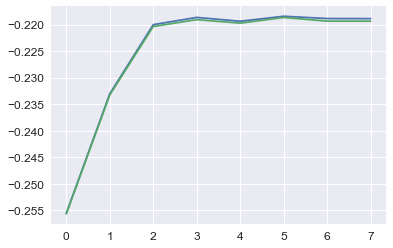

In [31]:
# evaluate for varying values of C. Plot training curves
import sklearn.learning_curve

C_values = [0.00001, 0.0001, 0.001, 0.01,0.1,1,10,100]

train_scores, test_scores = sklearn.learning_curve.validation_curve(
    LogisticRegression(), X_train, y_train, 'C', C_values, scoring='neg_log_loss')
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')

In [32]:
# Grid search: try 8 different possibilities
from sklearn.model_selection import GridSearchCV

params = {'C' : [0.1,1], 'penalty': ['l1', 'l2'], 
          'class_weight':[None, 'balanced'] }
grid = GridSearchCV(LogisticRegression(), params, scoring='neg_log_loss')
evaluate_model(grid)
grid.cv_results_

Train score: 0.217131153294
Test score: 0.209663113056
Total time: 521.190696001



{'mean_fit_time': array([ 35.90118694,   0.1677556 ,  37.95330167,   0.52334436,
         36.98002807,   0.18571472,  49.72743003,   0.39369861]),
 'mean_score_time': array([ 0.00523965,  0.00512004,  0.004836  ,  0.00606036,  0.00569701,
         0.00521088,  0.00462063,  0.00559107]),
 'mean_test_score': array([-0.21688981, -0.21973083, -0.38173406, -0.37981152, -0.2166314 ,
        -0.21866243, -0.38052714, -0.38049719]),
 'mean_train_score': array([-0.21629121, -0.21937481, -0.38092845, -0.37884041, -0.21606056,
        -0.21842702, -0.37960455, -0.37943774]),
 u'param_C': masked_array(data = [0.1 0.1 0.1 0.1 1 1 1 1],
              mask = [False False False False False False False False],
        fill_value = ?),
 u'param_class_weight': masked_array(data = [None None u'balanced' u'balanced' None None u'balanced' u'balanced'],
              mask = [False False False False False False False False],
        fill_value = ?),
 u'param_penalty': masked_array(data = [u'l1' u'l2' u'l1' u'

In [33]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty=u'l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=7, )
evaluate_model(rf)

Train score: 0.0529751003359
Test score: 0.186380893246
Total time: 2.29831314087



0.18638089324563464

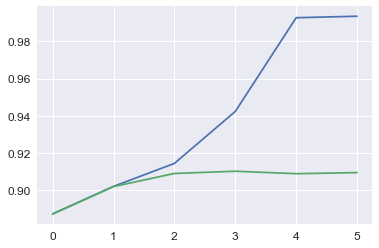

In [35]:
train_scores, test_scores = sklearn.model_selection.validation_curve(
    RandomForestClassifier(n_jobs=7), X_train, y_train, 'max_depth', [1,3,6,10,20,None])
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')

In [36]:
from sklearn import linear_model
logit = linear_model.LogisticRegression()

In [37]:
logit.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

NameError: name 'train' is not defined